In [60]:
#Support vector machine 
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns


In [61]:
data=pd.read_csv("Cancer_Data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [62]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
data=data.drop(['Unnamed: 32', 'id'],axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [66]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [67]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [68]:
data.isnull().values.any()

False

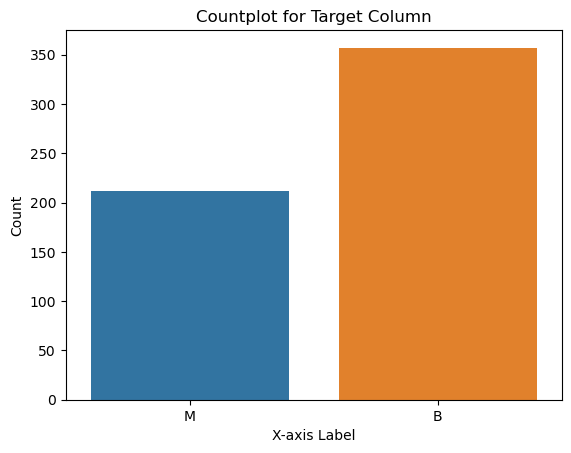

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=data)
plt.title("Countplot for Target Column")
plt.xlabel("X-axis Label")
plt.ylabel("Count")
plt.show()


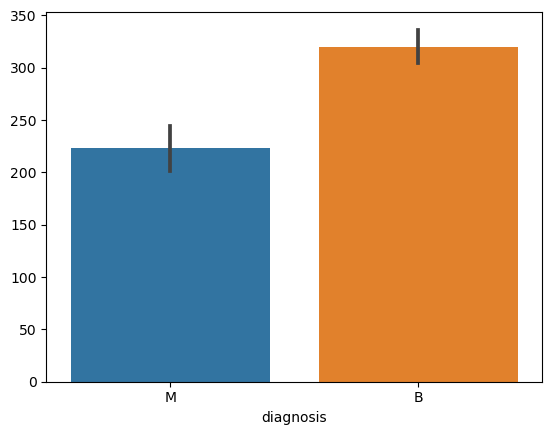

In [70]:
sns.barplot(x = "diagnosis", y = data.diagnosis.index, data= data);#Boxplot

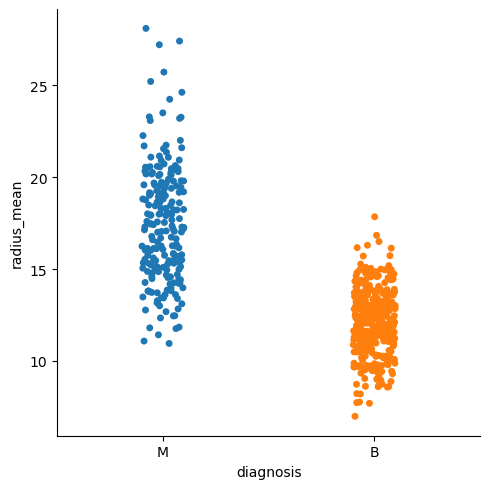

In [71]:
sns.catplot(x = "diagnosis", y = "radius_mean", data = data);

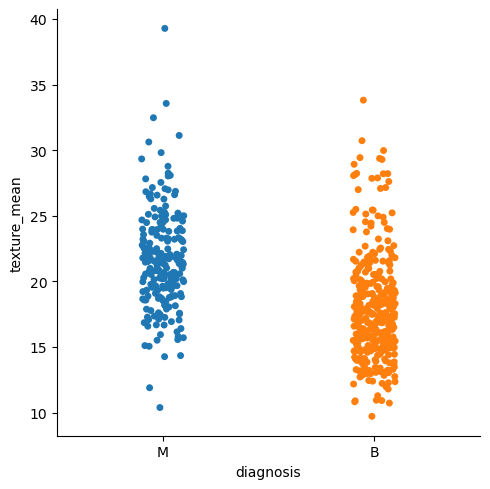

In [72]:
sns.catplot(x = "diagnosis", y = "texture_mean", data = data);

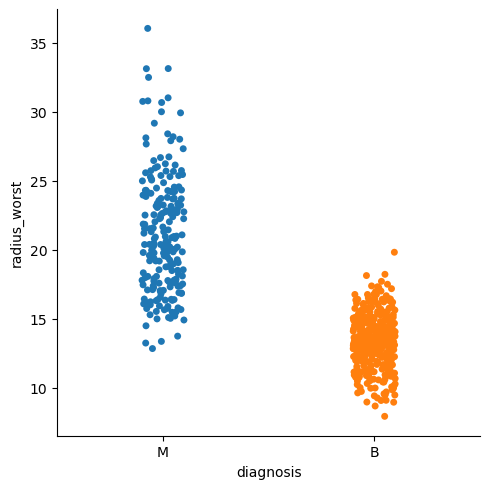

In [73]:
sns.catplot(x = "diagnosis", y = "radius_worst", data = data);

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concav

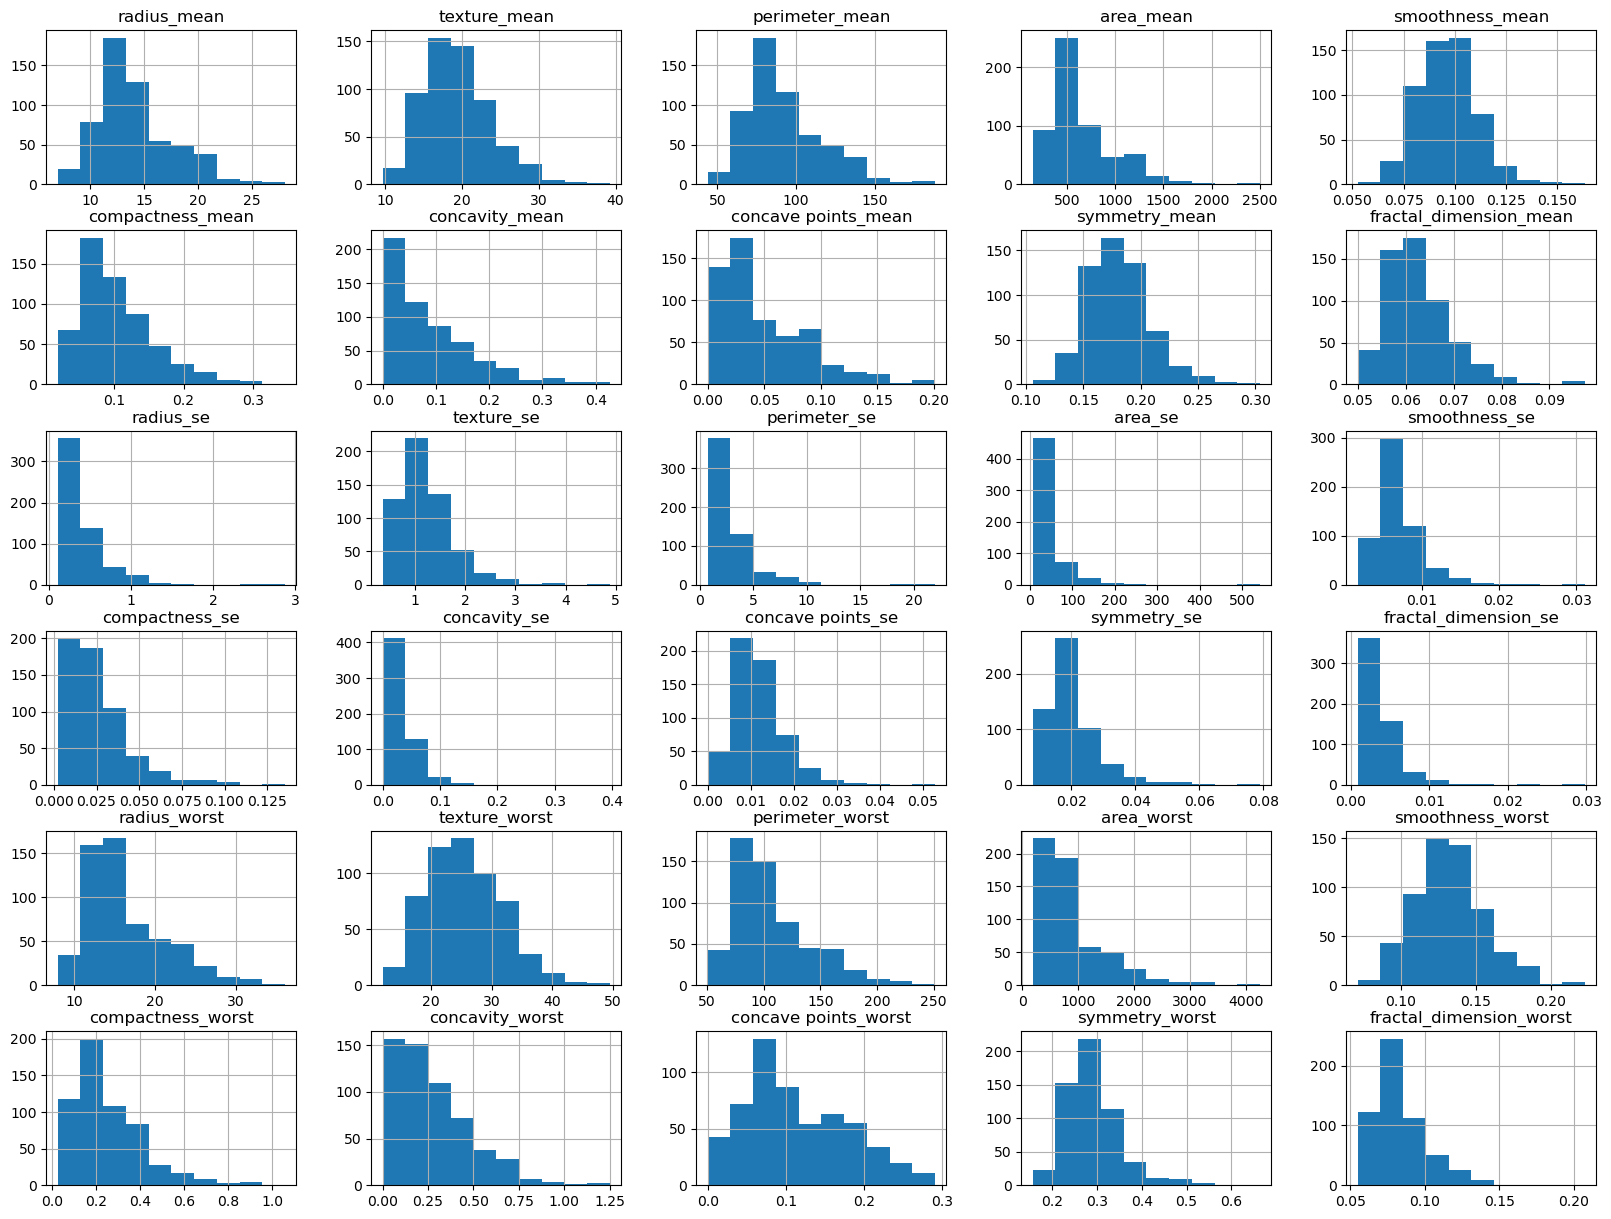

In [74]:
data.hist(figsize=(20,15))

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

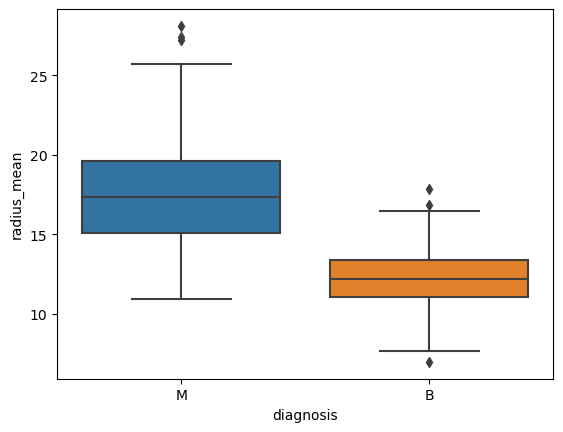

In [75]:
sns.boxplot(x="diagnosis", y="radius_mean", data=data)

<AxesSubplot:xlabel='diagnosis', ylabel='texture_mean'>

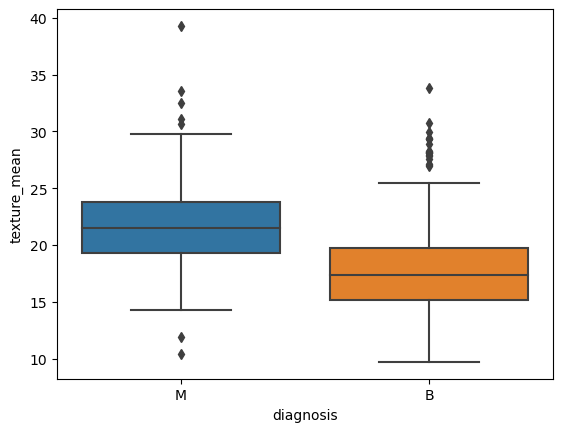

In [76]:
sns.boxplot(x="diagnosis", y="texture_mean", data=data)

<AxesSubplot:xlabel='diagnosis', ylabel='radius_worst'>

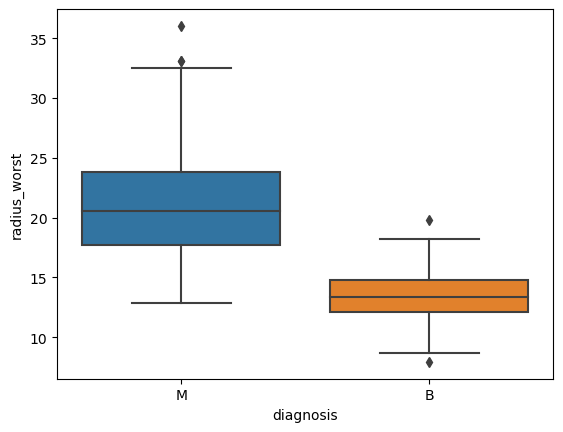

In [77]:
sns.boxplot(x="diagnosis", y="radius_worst", data=data)

<AxesSubplot:xlabel='diagnosis', ylabel='area_mean'>

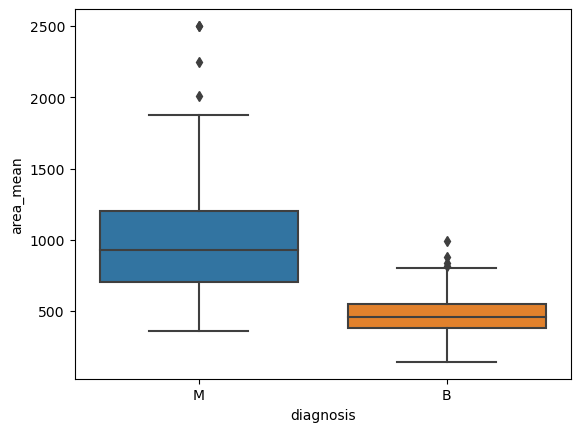

In [78]:
sns.boxplot(x="diagnosis", y="area_mean", data=data)

In [79]:
# Data Preprocessing
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [80]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [81]:
data_nums=data.select_dtypes(include=['int64','float64'])
data_nums.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [82]:
data_nums.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [83]:
data_nums["radius_mean"].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

In [84]:
data_nums["texture_mean"].describe()

count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64

In [85]:
data_nums["radius_mean"].value_counts()

12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: radius_mean, Length: 456, dtype: int64

In [86]:
categorical_list=["diagnosis"]

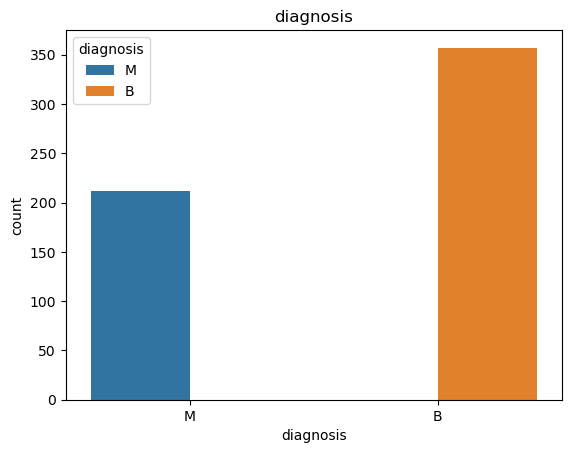

In [87]:
df_categoric = data.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "diagnosis")
    plt.title(i)

In [88]:
for i in data_nums: # oulier removel using IQR method

    # IQR
    Q1 = np.percentile(data.loc[:, i],25)
    Q3 = np.percentile(data.loc[:, i],75)

    IQR = Q3 - Q1

    print("Old shape: ", data.loc[:, i].shape)

    # upper bound
    upper = np.where(data.loc[:, i] >= (Q3 +2.5*IQR))

    # lower bound
    lower = np.where(data.loc[:, i] <= (Q1 - 2.5*IQR))

    print("{} -- {}".format(upper, lower))

    try:
        data.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    try:
        data.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))

    print("New shape: ", data.shape)

Old shape:  (569,)
(array([180, 212, 461], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (566, 31)
Old shape:  (566,)
(array([237], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (565, 31)
Old shape:  (565,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (565, 31)
Old shape:  (565,)
(array([ 82, 122, 164, 201, 234, 336, 349, 499, 517], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (556, 31)
Old shape:  (556,)
(array([492], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (555, 31)
Old shape:  (555,)
(array([ 78, 250], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (553, 31)
Old shape:  (553,)
(array([106, 149], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (551, 31)
Old shape:  (551,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (551, 31)
Old shape:  (551,)
(array([25], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (550, 31)
Old shape:  (550,)
(array([  3,  70, 146, 305, 486, 487]

In [89]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,...,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,13.871629,19.318540,90.175497,627.561055,0.096033,0.101483,0.084272,0.046377,0.180374,0.062837,...,15.928834,25.700325,104.839696,839.348073,0.131985,0.246995,0.262659,0.110233,0.287301,0.083637
std,3.279214,4.367025,22.539123,314.484749,0.013760,0.049341,0.074887,0.035984,0.025750,0.006893,...,4.552686,6.233810,31.608730,521.850740,0.022654,0.150546,0.205065,0.062857,0.055527,0.017552
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.600000,16.180000,74.330000,409.100000,0.085880,0.062900,0.028190,0.019680,0.162000,0.058010,...,12.840000,21.180000,83.510000,507.200000,0.116200,0.144000,0.111700,0.062960,0.248700,0.071150
50%,13.170000,18.770000,84.880000,534.600000,0.095660,0.089180,0.058920,0.031570,0.178400,0.061680,...,14.670000,25.210000,96.080000,657.000000,0.131100,0.207400,0.211400,0.096080,0.281200,0.079930
75%,15.460000,21.820000,102.500000,744.700000,0.104800,0.129600,0.120400,0.068730,0.195700,0.066150,...,17.980000,29.720000,121.400000,985.500000,0.144900,0.321400,0.370300,0.156400,0.316300,0.092080
max,25.730000,39.280000,174.200000,2010.000000,0.163400,0.311400,0.426400,0.191300,0.274300,0.095750,...,33.130000,49.540000,229.300000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.488200,0.207500


In [90]:
data.shape

(493, 31)

# standardization

In [91]:
from sklearn import preprocessing
preprocessing.scale(data_nums) # scales the vlaues between -1-1

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [92]:
preprocessing.normalize(data_nums) # scales the values between 0-1

array([[7.92541486e-03, 4.57286305e-03, 5.40989964e-02, ...,
        1.16920795e-04, 2.02695018e-04, 5.23808686e-05],
       [8.66575595e-03, 7.48616836e-03, 5.59882822e-02, ...,
        7.83583182e-05, 1.15852352e-04, 3.75024596e-05],
       [9.36668268e-03, 1.01087865e-02, 6.18419883e-02, ...,
        1.15596947e-04, 1.71873157e-04, 4.16624718e-05],
       ...,
       [1.16438847e-02, 1.96964025e-02, 7.59658259e-02, ...,
        9.94640269e-05, 1.55579134e-04, 5.48525170e-05],
       [9.23020523e-03, 1.31418408e-02, 6.27743569e-02, ...,
        1.18738077e-04, 1.83125480e-04, 5.55604587e-05],
       [2.31098880e-02, 7.30820427e-02, 1.42709515e-01, ...,
        0.00000000e+00, 8.55006294e-04, 2.09626935e-04]])

In [93]:
scaler = preprocessing.MinMaxScaler(feature_range = (100,200)) # scales the values between 100-200
scaler.fit_transform(data_nums)

array([[152.10374367, 102.26580994, 154.59885288, ..., 191.20274914,
        159.84624483, 141.88639643],
       [164.31444934, 127.25735543, 161.57832907, ..., 163.91752577,
        123.3589592 , 122.2878132 ],
       [160.14955748, 139.02603991, 159.57432106, ..., 183.50515464,
        140.37058939, 121.34330316],
       ...,
       [145.52510767, 162.1237741 , 144.5788128 , ..., 148.72852234,
        112.87206781, 115.19086974],
       [164.45643428, 166.35103145, 166.55379725, ..., 191.0652921 ,
        149.71417307, 145.23153614],
       [103.68687586, 150.15218126, 102.85398383, ..., 100.        ,
        125.74413562, 110.06821461]])

In [94]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
lbe.fit_transform(data["diagnosis"])# labeling the classes with 0 and 1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [95]:
data["new_diagnosis"]=lbe.fit_transform(data["diagnosis"])
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,new_diagnosis
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,1
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.17030,0.54010,0.5390,0.2060,0.4378,0.10720,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [96]:
data["diagnosis"].str.contains("M")

1       True
2       True
4       True
5       True
8       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: diagnosis, Length: 493, dtype: bool

In [97]:
data["new_diagnosis"] = np.where(data["diagnosis"].str.contains("M"), 1, 0)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,new_diagnosis
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,1
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.17030,0.54010,0.5390,0.2060,0.4378,0.10720,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


# KNN

In [98]:

y=data["new_diagnosis"]
x=data.drop(["diagnosis","new_diagnosis"],axis=1)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [100]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [101]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [102]:
y_pred = knn_model.predict(X_test)

In [103]:
accuracy_score(y_test, y_pred)

0.9391891891891891

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        86
           1       0.96      0.89      0.92        62

    accuracy                           0.94       148
   macro avg       0.94      0.93      0.94       148
weighted avg       0.94      0.94      0.94       148



In [105]:
print(y_pred)

[0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0]


In [106]:
x.iloc[375]


radius_mean                 12.870000
texture_mean                19.540000
perimeter_mean              82.670000
area_mean                  509.200000
smoothness_mean              0.091360
compactness_mean             0.078830
concavity_mean               0.017970
concave points_mean          0.020900
symmetry_mean                0.186100
fractal_dimension_mean       0.063470
radius_se                    0.366500
texture_se                   0.769300
perimeter_se                 2.597000
area_se                     26.500000
smoothness_se                0.005910
compactness_se               0.013620
concavity_se                 0.007066
concave points_se            0.006502
symmetry_se                  0.022230
fractal_dimension_se         0.002378
radius_worst                14.450000
texture_worst               24.380000
perimeter_worst             95.140000
area_worst                 626.900000
smoothness_worst             0.121400
compactness_worst            0.165200
concavity_wo

In [107]:
desired_row=x.iloc[375]
user_dt=desired_row.to_numpy()
user_dt=user_dt.reshape(1,-1)
print(user_dt)

[[1.287e+01 1.954e+01 8.267e+01 5.092e+02 9.136e-02 7.883e-02 1.797e-02
  2.090e-02 1.861e-01 6.347e-02 3.665e-01 7.693e-01 2.597e+00 2.650e+01
  5.910e-03 1.362e-02 7.066e-03 6.502e-03 2.223e-02 2.378e-03 1.445e+01
  2.438e+01 9.514e+01 6.269e+02 1.214e-01 1.652e-01 7.127e-02 6.384e-02
  3.313e-01 7.735e-02]]


In [108]:
user_predict=knn_model.predict(user_dt)
print(user_predict)



[0]


In [109]:
y.iloc[375]

0

# Random Forest Classification

In [110]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rand=RandomForestClassifier()
rand.fit(X_train, y_train)
ypred = rand.predict(X_test)
print("accuracy : ", rand.score(X_test, y_test))
print()

accuracy :  0.9527027027027027



In [111]:
rand.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [112]:
predict=rand.predict(user_dt)
print(predict)



[0]


# support vactor machine Algorithem

In [113]:
from sklearn.svm import SVC

# "Support vector classifier"
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)
ypred=classifier.predict(X_test)
print("accuracy :",classifier.score(X_test,y_test))
print()
print(ypred)

accuracy : 0.9594594594594594

[0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1
 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0]


# Arificial Neural Network

In [114]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier().fit(X_train_scaled, y_train)
y_pred = mlpc.predict(X_test_scaled)

In [116]:
import pickle

# Save KNN model
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

# Save Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rand, file)

# Save SVM model
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)

# Save MLP Classifier model
with open('mlp_classifier_model.pkl', 'wb') as file:
    pickle.dump(mlpc, file)
